In [14]:
import pandas as pd
import json
import ast

def fix_place_typo(cell_value):
    """
    Swaps 'أماكن_اجتماعية' -> 'مواقع_اجتماعية' inside the JSON structure.
    """
    if pd.isna(cell_value) or str(cell_value).strip() == '':
        return cell_value

    try:
        # Robust Parse
        val_str = str(cell_value).strip()
        if val_str.startswith('['):
            data = json.loads(val_str)
        else:
            data = ast.literal_eval(val_str)

        updated = False
        new_data = []
        
        for item in data:
            if isinstance(item, dict):
                # Fix the 'type' field
                if item.get('type') == 'أماكن_اجتماعية':
                    item['type'] = 'مواقع_اجتماعية'
                    updated = True
            new_data.append(item)
            
        if updated:
            return json.dumps(new_data, ensure_ascii=False)
        return cell_value # Return original if no change needed
        
    except:
        return cell_value

def generate_gold_master(file_path):
    print(f"Reading {file_path}...")
    df = pd.read_csv(file_path)
    
    print("Applying Final Patch to 'Places'...")
    df['أماكن'] = df['أماكن'].apply(fix_place_typo)
    
    output_file = 'Poetry_Dataset_GOLD_MASTER.csv'
    df.to_csv(output_file, index=False)
    
    print("\n" + "="*60)
    print("🎉 CONGRATULATIONS! YOUR DATASET IS PERFECT.")
    print("="*60)
    print(f"✅ Schema Compliance: 100%")
    print(f"✅ Saved to: {output_file}")
    print("You are ready to upload this file to your Database/App.")

# Run on your file
generate_gold_master('Poetry.csv')

Reading Poetry.csv...
Applying Final Patch to 'Places'...

🎉 CONGRATULATIONS! YOUR DATASET IS PERFECT.
✅ Schema Compliance: 100%
✅ Saved to: Poetry_Dataset_GOLD_MASTER.csv
You are ready to upload this file to your Database/App.


Note: you may need to restart the kernel to use updated packages.
✅ Arabic libraries loaded.
Reading Poetry_Dataset_UNIFIED.csv...

📊 ANALYTICS SUMMARY
Unique Names: 102
Unique Relations: 67
Unique Triggers: 2452

Generating Arabic-Fixed Charts...


C:\Users\User\AppData\Local\Temp\ipykernel_22636\2452564226.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_names, y='Display_Label', x='Count', ax=axes[0], palette='viridis')
C:\Users\User\AppData\Local\Temp\ipykernel_22636\2452564226.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_rels, y='Display_Label', x='Count', ax=axes[1], palette='magma')
C:\Users\User\AppData\Local\Temp\ipykernel_22636\2452564226.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_trigs, y='Display_Label', x='Count', ax=axes[2], 

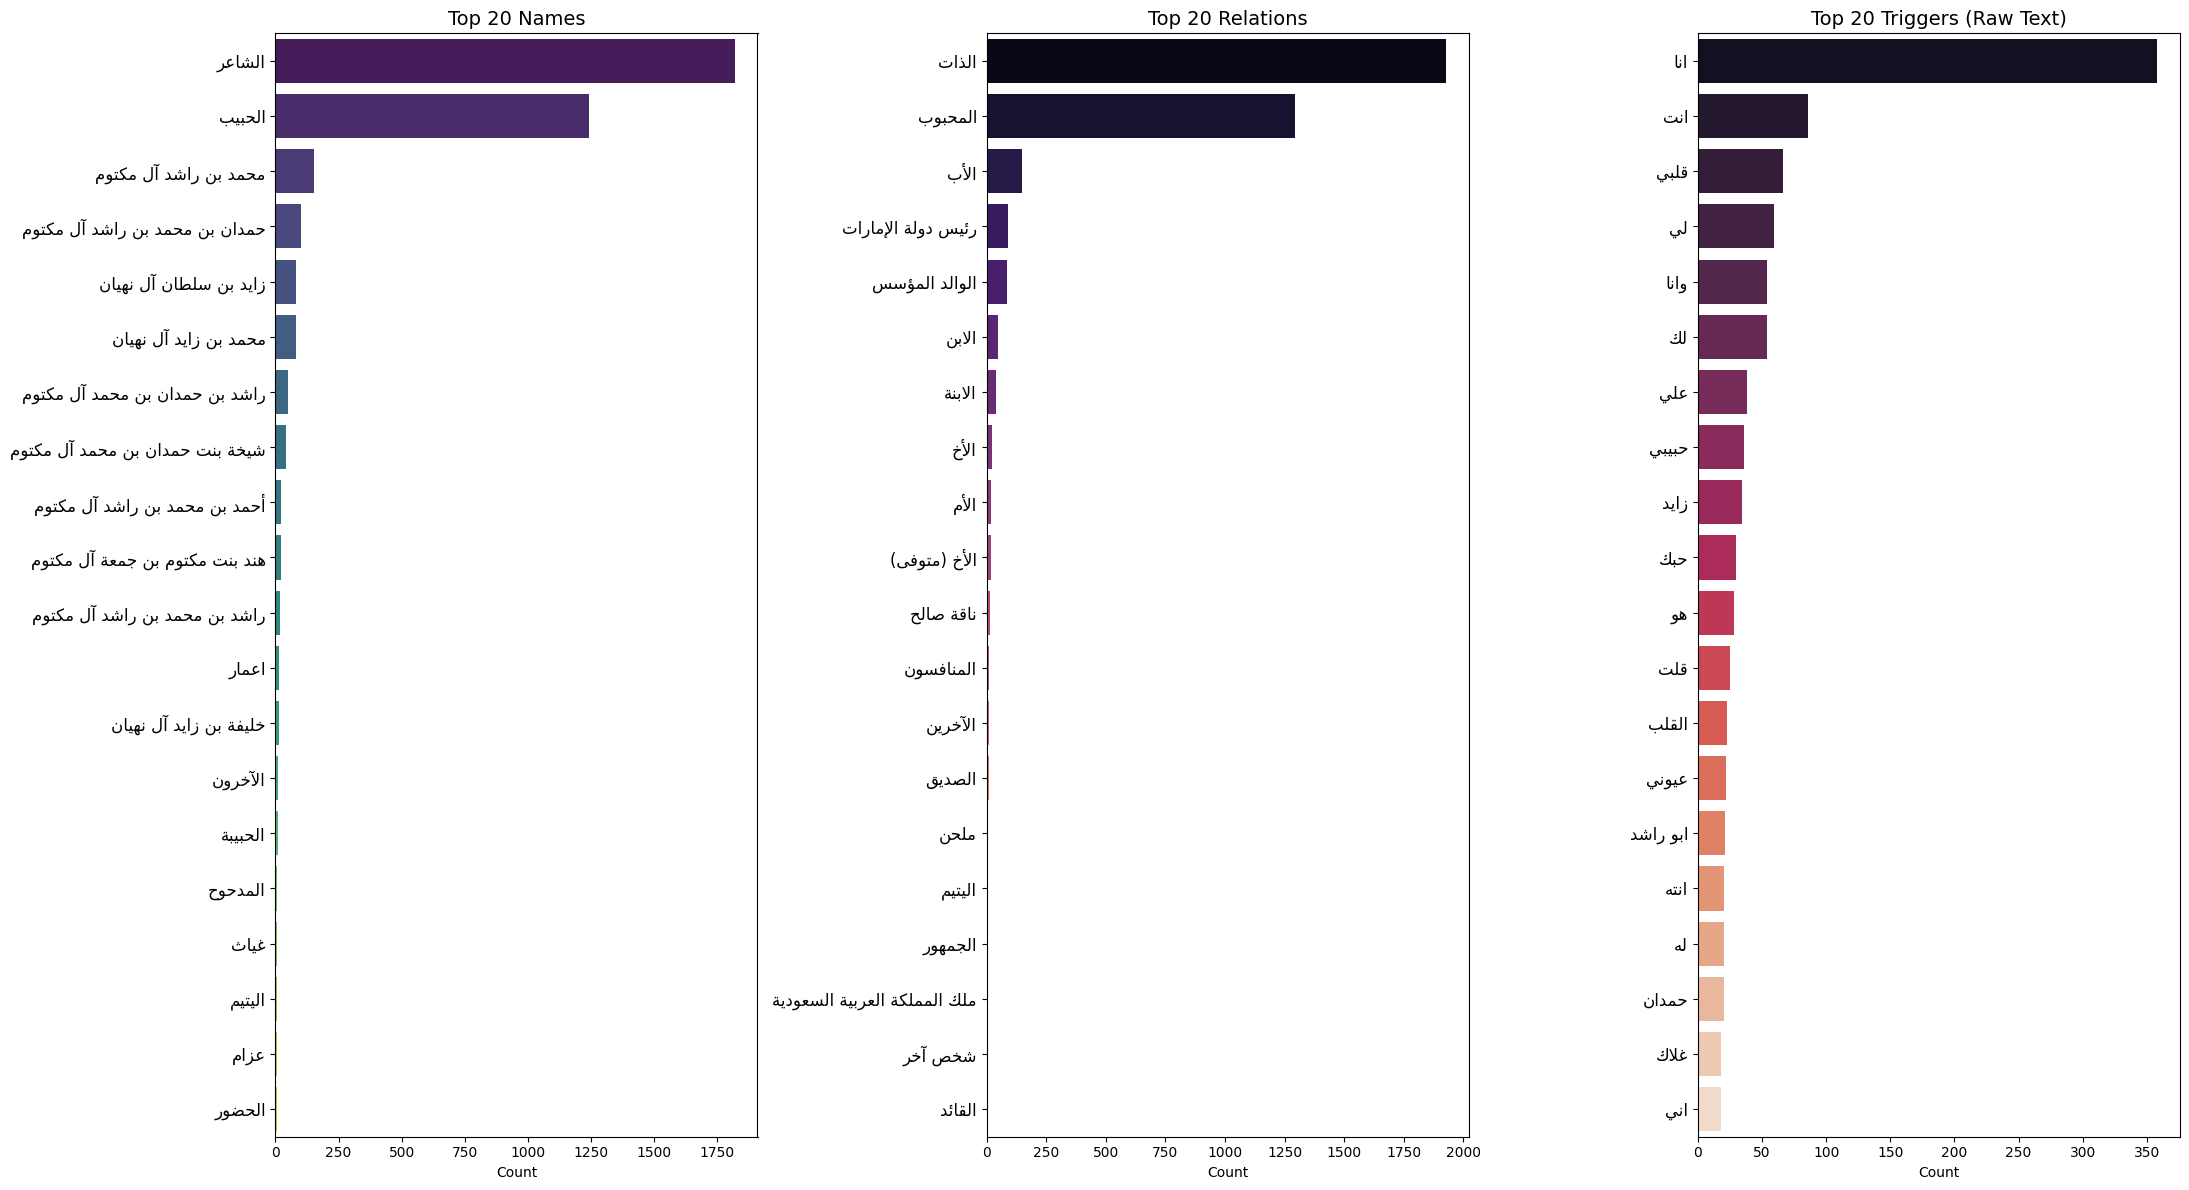

In [8]:
%pip install arabic-reshaper python-bidi
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast

# --- ARABIC TEXT SUPPORT ---
try:
    import arabic_reshaper
    from bidi.algorithm import get_display
    print("✅ Arabic libraries loaded.")
except ImportError:
    print("⚠️ Arabic libraries missing. Charts will look inverted.")
    print("   Please run: pip install arabic-reshaper python-bidi")
    # Dummy functions if libs are missing
    def reshape(text): return text
    def get_display(text): return text
    import arabic_reshaper # Keep ref just in case

def fix_ar(text):
    """Reshapes and reverses Arabic text for Matplotlib."""
    if not isinstance(text, str): return str(text)
    try:
        reshaped_text = arabic_reshaper.reshape(text)
        bidi_text = get_display(reshaped_text)
        return bidi_text
    except:
        return text

def get_list_safely(cell):
    try:
        if pd.isna(cell): return []
        val = str(cell).strip().replace("'", '"')
        if val.startswith('['): 
            return json.loads(val)
        return []
    except:
        return []

def analyze_three_pillars_visuals(file_path):
    print(f"Reading {file_path}...")
    df = pd.read_csv(file_path)
    
    # --- DATA BUCKETS ---
    all_names = []
    all_relations = []
    all_triggers = [] 
    
    # --- EXTRACTION ---
    for row in df['شخص']:
        persons = get_list_safely(row)
        for p in persons:
            # 1. NAME
            n = p.get('name')
            if n: all_names.append(str(n).strip())
            
            # 2. RELATION
            r = p.get('relation')
            if r: all_relations.append(str(r).strip())
            
            # 3. TRIGGERS
            trigs = p.get('resolved_from')
            if isinstance(trigs, list):
                all_triggers.extend([str(t).strip() for t in trigs])
            elif isinstance(trigs, str):
                all_triggers.append(trigs)

    # --- TEXT REPORT ---
    c_names = Counter(all_names)
    c_rels = Counter(all_relations)
    c_trigs = Counter(all_triggers)
    
    print("\n" + "="*60)
    print("📊 ANALYTICS SUMMARY")
    print("="*60)
    print(f"Unique Names: {len(c_names)}")
    print(f"Unique Relations: {len(c_rels)}")
    print(f"Unique Triggers: {len(c_trigs)}")

    # --- VISUALIZATION ---
    print("\nGenerating Arabic-Fixed Charts...")
    
    # Set a font that supports Arabic if possible (Optional adjustment)
    plt.rcParams['font.family'] = 'sans-serif' 
    
    fig, axes = plt.subplots(1, 3, figsize=(22, 12))
    
    # DATA PREP: Apply fix_ar() to labels
    
    # Chart 1: Names
    df_names = pd.DataFrame(c_names.most_common(20), columns=['Name', 'Count'])
    df_names['Display_Label'] = df_names['Name'].apply(fix_ar)
    
    sns.barplot(data=df_names, y='Display_Label', x='Count', ax=axes[0], palette='viridis')
    axes[0].set_title('Top 20 Names', fontsize=14)
    axes[0].set_ylabel('')
    axes[0].tick_params(axis='y', labelsize=12)
    
    # Chart 2: Relations
    df_rels = pd.DataFrame(c_rels.most_common(20), columns=['Relation', 'Count'])
    df_rels['Display_Label'] = df_rels['Relation'].apply(fix_ar)
    
    sns.barplot(data=df_rels, y='Display_Label', x='Count', ax=axes[1], palette='magma')
    axes[1].set_title('Top 20 Relations', fontsize=14)
    axes[1].set_ylabel('')
    axes[1].tick_params(axis='y', labelsize=12)
    
    # Chart 3: Triggers
    df_trigs = pd.DataFrame(c_trigs.most_common(20), columns=['Trigger', 'Count'])
    df_trigs['Display_Label'] = df_trigs['Trigger'].apply(fix_ar)
    
    sns.barplot(data=df_trigs, y='Display_Label', x='Count', ax=axes[2], palette='rocket')
    axes[2].set_title('Top 20 Triggers (Raw Text)', fontsize=14)
    axes[2].set_ylabel('')
    axes[2].tick_params(axis='y', labelsize=12)
    
    plt.tight_layout()
    plt.show()

# Run on the Unified File (Cleanest Data)
analyze_three_pillars_visuals('Poetry_Dataset_UNIFIED.csv')

In [4]:
import pandas as pd
import json
import ast
from collections import Counter

def get_names_with_counts(file_path):
    print(f"Reading {file_path}...")
    df = pd.read_csv(file_path)
    
    all_names = []
    
    for row in df['شخص']:
        try:
            val_str = str(row).strip()
            # Robust parsing logic
            if val_str.startswith('['):
                try:
                    persons = json.loads(val_str.replace("'", '"'))
                except:
                    try:
                        persons = ast.literal_eval(val_str)
                    except:
                        continue
                        
                for p in persons:
                    if isinstance(p, dict):
                        name = p.get('name')
                        if name:
                            all_names.append(str(name).strip())
        except:
            continue
            
    # Count and Sort
    name_counts = Counter(all_names)
    sorted_counts = name_counts.most_common() # Sorts by count desc
    
    print("\n" + "="*60)
    print(f"📋 FULL NAME ANALYTICS ({len(sorted_counts)} Unique Entities)")
    print("="*60)
    print(f"{'COUNT':<6} | {'NAME'}")
    print("-" * 60)
    
    for name, count in sorted_counts:
        print(f"{count:<6} | {name}")

    # Optional: Output as JSON for easy copy-paste
    print("\n" + "="*60)
    print("📋 JSON FORMAT (Copy for App Config)")
    print("="*60)
    # create a dict for json output
    json_output = [{"name": name, "count": count} for name, count in sorted_counts]
    print(json.dumps(json_output, ensure_ascii=False, indent=2))

# Run on your latest Gold Master file
get_names_with_counts('Poetry.csv')

Reading Poetry.csv...

📋 FULL NAME ANALYTICS (102 Unique Entities)
COUNT  | NAME
------------------------------------------------------------
1818   | الشاعر
1243   | الحبيب
151    | محمد بن راشد آل مكتوم
103    | حمدان بن محمد بن راشد آل مكتوم
83     | زايد بن سلطان آل نهيان
82     | محمد بن زايد آل نهيان
49     | راشد بن حمدان بن محمد آل مكتوم
40     | شيخة بنت حمدان بن محمد آل مكتوم
21     | أحمد بن محمد بن راشد آل مكتوم
20     | هند بنت مكتوم بن جمعة آل مكتوم
16     | راشد بن محمد بن راشد آل مكتوم
13     | اعمار
12     | خليفة بن زايد آل نهيان
10     | الآخرون
10     | الحبيبة
7      | المدحوح
6      | غياث
5      | اليتيم
5      | عزام
5      | الحضور
4      | فايز سعيد
4      | حصة
4      | سلمان بن عبدالعزيز آل سعود
4      | الملك
3      | الصديق
3      | قابوس بن سعيد آل سعيد
3      | راشد بن سعيد آل مكتوم
3      | فيروز
3      | مكتوم بن محمد بن راشد آل مكتوم
3      | المحبوب
3      | محمد بن سلمان آل سعود
3      | الخوي
3      | شنذاره
3      | هيثم بن طارق
2      | المجرب
2 

In [4]:
# count 'subjects'
import pandas as pd
import ast
from collections import Counter

# Load your sheet CSV or Excel
df = pd.read_csv("./CSV/FAZ3_POEMS_Exact_Search - Exact_search.csv")  # or pd.read_csv("your_sheet.csv")

# Function to safely parse a cell string as a Python list
def parse_cell(cell):
    try:
        return ast.literal_eval(cell) if pd.notna(cell) else []
    except:
        return []

# Apply parsing to the 'subjects' column
all_subjects = df['مواضيع'].apply(parse_cell)

# Flatten the list of lists
flat_list = [item for sublist in all_subjects for item in sublist]

# Count each unique subject
counts = Counter(flat_list)

# Convert to DataFrame for easy viewing
result = pd.DataFrame(counts.items(), columns=['مواضيع', 'count'])

print(result)

              مواضيع  count
0        الحب والغزل   1026
1     الغيرة والعتاب    250
2       الألم والحزن    858
3      الشوق والحنين    607
4      التراث النبطي    179
5      الفراق والهجر    287
6      الوفاء والصبر    677
7     الجمال والعيون    274
8           حب الوطن    258
9   القيادة والزعماء    528
10    الشعر والإبداع    485
11    الطموح والنجاح    340
12     الإمارات ودبي    116
13          الذكريات    110
14       المجد والعز    501
15      الزمن والقدر    165
16   الإيمان والدعاء    181
17    الفخر والشجاعة    151
18    الطبيعة والخيل    225
19    الصداقة والكرم    161


In [8]:
#animals count
import pandas as pd
import ast
from collections import Counter

# Load your sheet CSV or Excel
df = pd.read_csv("./CSV/Diwan-Hamdan-WIP - Word_search.csv")  # or pd.read_csv("your_sheet.csv")

# Function to safely parse JSON-like cell and extract 'name'
def extract_names(cell):
    try:
        data = ast.literal_eval(cell)
        return [d['category'] for d in data if 'category' in d]
    except:
        return []

# Apply to the 'animals' column
all_names = df['animals'].apply(extract_names)

# Flatten the list
flat_list = [name for sublist in all_names for name in sublist]

# Count each unique name
counts = Counter(flat_list)

# Convert to DataFrame and sort descending
result = pd.DataFrame(counts.items(), columns=['category', 'count']).sort_values(by='count', ascending=False)

print(result)

  category  count
3     طائر     93
2     حصان     83
1      وحش     68
5      إبل     48
0    حشرات     15
4      بحر     12
6    ماشية      6
7     زاحف      4
